In [ ]:
def cvt_coord(i):
    return [(i//5-2)/2., (i%5-2)/2.]
    #return [np.random.rand(),(i%5-2)/2.]

In [ ]:
import numpy as np
coord = np.zeros((1, 25, 2))

In [ ]:
for i in range(25):#5x5 feature map
    coord[:,i,:] = np.array(cvt_coord(i))

In [ ]:
coord = np.squeeze(coord)
x =coord[:,0].reshape(5,5)
y = coord[:,1].reshape(5,5)

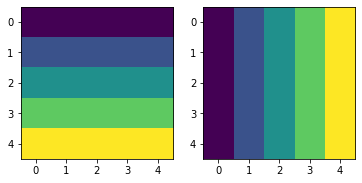

In [ ]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(x)
ax2.imshow(y)

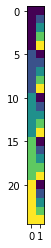

In [ ]:
plt.imshow(coord)

In [ ]:
def cvt_coord(i):
    xy_dim = 12
    feature_dim = 24
    dim_t = np.arange(xy_dim)
    dim_t = 10000**(2 * (dim_t // 2) / feature_dim )
    x = i//5#row
    y = i%5#col
    x_pos = dim_t 
    y_pos = dim_t.copy()

    x_pos[0:xy_dim:2] = np.sin(x/x_pos[0:xy_dim:2])
    x_pos[1:xy_dim:2] = np.cos(x/x_pos[1:xy_dim:2])
    y_pos[0:xy_dim:2] = np.sin(y/y_pos[0:xy_dim:2])
    y_pos[1:xy_dim:2] = np.cos(y/y_pos[1:xy_dim:2])
    #x_pos = np.random.rand(self.xy_dim)
    pos = np.concatenate((x_pos,y_pos))
    return pos

In [ ]:
np_coord_tensor = np.zeros((64,25,24))#64x25x24
for i in range(25):#5x5 feature map
    np_coord_tensor[:,i,:] = np.array(cvt_coord(i))

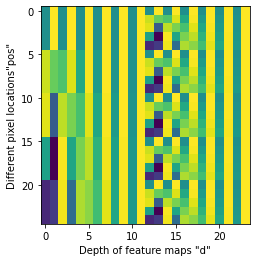

In [ ]:
plt.imshow(np_coord_tensor[63])
plt.ylabel('Different pixel locations"pos"')
plt.xlabel('Depth of feature maps "d"')
plt.savefig('sinPE.png')

In [ ]:
import os
import pickle
def load_data():
    print('loading data...')
    dirs = './data'
    filename = os.path.join(dirs,'more-clevr.pickle')
    with open(filename, 'rb') as f:
      train_datasets, test_datasets = pickle.load(f)
    rel_train = []
    rel_test = []
    norel_train = []
    norel_test = []
    print('processing data...')

    for img, relations, norelations in train_datasets:
        img = np.swapaxes(img, 0, 2)
        for qst,ans in zip(relations[0], relations[1]):
            rel_train.append((img,qst,ans))
        for qst,ans in zip(norelations[0], norelations[1]):
            norel_train.append((img,qst,ans))

    for img, relations, norelations in test_datasets:
        img = np.swapaxes(img, 0, 2)
        for qst,ans in zip(relations[0], relations[1]):
            rel_test.append((img,qst,ans))
        for qst,ans in zip(norelations[0], norelations[1]):
            norel_test.append((img,qst,ans))
    
    return (rel_train, rel_test, norel_train, norel_test)

In [ ]:
rel_train, rel_test, norel_train, norel_test = load_data()

loading data...


FileNotFoundError: ignored

In [ ]:
rel_test[1][1]

In [ ]:
img = np.einsum('abc->bca', rel_test[1][0])
plt.imshow(img[:,:,::-1])

In [ ]:
np.squeeze(norel_test)[:,1].sum()

In [ ]:
a = [73,75,73]
print(np.average(a))
print(np.std(a))

In [ ]:
import torch
x = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]])
x = torch.einsum('abc->acb', x)
x= x.contiguous()
x.shape

In [ ]:
x.view(2,9)

In [ ]:
y = x.clone()
y

In [ ]:
np.dot([1,2],[3,4])

In [ ]:
def cvt_coord(i,j):
    xy_dim = 2
    feature_dim = 4
    dim_t = np.arange(xy_dim)
    dim_t = 10000**(2 * (dim_t // 2) / feature_dim )

    #positional encoding for pixel at ith position
    x1 = i//5#row
    y1 = i%5#col
    x1_pos = dim_t.copy()
    y1_pos = dim_t.copy()

    x1_pos[0:xy_dim:2] = np.sin(x1/x1_pos[0:xy_dim:2])
    x1_pos[1:xy_dim:2] = np.cos(x1/x1_pos[1:xy_dim:2])
    y1_pos[0:xy_dim:2] = np.sin(y1/y1_pos[0:xy_dim:2])
    y1_pos[1:xy_dim:2] = np.cos(y1/y1_pos[1:xy_dim:2])
    #y_pos = np.random.rand(self.xy_dim)
    pos1 = np.concatenate((x1_pos,y1_pos))

    #positional encoding for pixel at ith position
    x2 = j//5#row
    y2 = j%5#col
    x2_pos = dim_t.copy()
    y2_pos = dim_t.copy()

    x2_pos[0:xy_dim:2] = np.sin(x2/x2_pos[0:xy_dim:2])
    x2_pos[1:xy_dim:2] = np.cos(x2/x2_pos[1:xy_dim:2])
    y2_pos[0:xy_dim:2] = np.sin(y2/y2_pos[0:xy_dim:2])
    y2_pos[1:xy_dim:2] = np.cos(y2/y2_pos[1:xy_dim:2])
    #y_pos = np.random.rand(self.xy_dim)
    pos2 = np.concatenate((x2_pos,y2_pos))

    x_relative = np.dot(x1_pos,x2_pos)
    y_relative = np.dot(y1_pos,y2_pos)
    
    pos = np.concatenate([pos1,pos2,[x_relative,y_relative]])
    #pos = [x_relative,y_relative]
    return pos

In [ ]:
np_coord_tensor = np.zeros((64,25,25,10))#64x25x24
for i in range(25):#5x5 feature map
    for j in range(25):
        np_coord_tensor[:,i,j,:] = np.array(cvt_coord(i,j))

In [ ]:
plt.imshow(np_coord_tensor[0,0,:,:])

In [ ]:
import torch
import torch.nn as nn

In [ ]:
w_y = nn.Parameter(torch.rand(25, 12)) #25x12
cita_y = nn.Parameter(torch.rand(25, 12)) 
r_y = nn.Parameter(torch.rand(25, 12)) 

In [ ]:
col = torch.arange(5.0).repeat(5)
col = torch.unsqueeze(col,1).repeat(1,12)
#plt.imshow(torch.mul(r_y,torch.sin(torch.mul(col,w_y)+cita_y)).detach().numpy())
#torch.mul(r_y,torch.sin(torch.mul(col,w_y)+cita_y))[:,0:12:2].shape
col

In [ ]:
row = torch.arange(5.0).repeat_interleave(5)
row = torch.unsqueeze(row,1).repeat(1,12)
plt.imshow(row)

In [ ]:
plt.imshow(torch.cat((row,col),dim=1).detach().numpy())

In [ ]:
a = torch.arange(12)
torch.stack((0*a[0::2],a[1::2]),dim = 1)

In [ ]:
torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)